<a href="https://colab.research.google.com/github/sunilsm7/numpy-demos/blob/main/Computation_on_arrays_broadcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computation on Arrays: Broadcasting


Broadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

In [1]:
import numpy as np

## Introducing Broadcasting

Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:

In [2]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
print(a+b)

[5 6 7]


Broadcasting allows these types of binary operations to be performed on arrays of different sizes–for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [3]:
a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value `5` into the array `[5, 5, 5]`, and adds the results. The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

We can similarly extend this to arrays of higher dimension. Observe the result when we add a one-dimensional array to a two-dimensional array:

In [4]:
M = np.ones((3, 3))
print(M)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [5]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here the one-dimensional array `a` is stretched, or broadcast across the second dimension in order to match the shape of `M`.

While these examples are relatively easy to understand, more complicated cases can involve broadcasting of both arrays. Consider the following example:

In [6]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [7]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Just as before we stretched or broadcasted one value to match the shape of the other, here we've stretched both a and b to match a common shape, and the result is a two-dimensional array! 

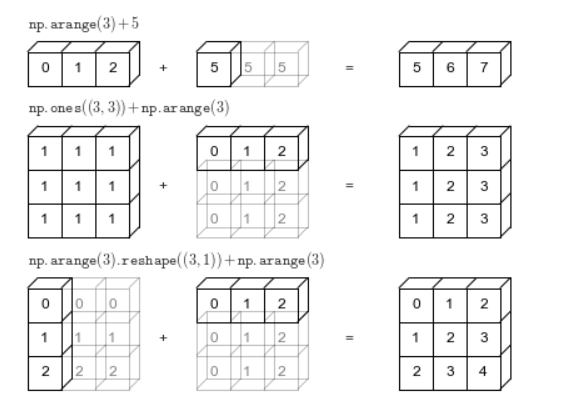

## Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

*   Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
*   Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
* Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

To make these rules clear, let's consider a few examples in detail.



**Broadcasting example 1**

In [8]:
M = np.ones((2, 3))
a = np.arange(3)

Let's consider an operation on these two arrays. The shape of the arrays are


*   `M.shape = (2, 3)`
*   `a.shape = (3,)`

We see by rule 1 that the array a has fewer dimensions, so we pad it on the left with ones:

*  `M.shape -> (2, 3)`
*  `a.shape -> (1, 3)`


By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

* `M.shape -> (2, 3)`
* `a.shape -> (2, 3)`


The shapes match, and we see that the final shape will be `(2, 3)`:





In [9]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

**Broadcasting example 2**

Let's take a look at an example where both arrays need to be broadcast:

In [10]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

Again, we'll start by writing out the shape of the arrays:

* `a.shape = (3, 1)`
* `b.shape = (3,)`

Rule 1 says we must pad the shape of b with ones:

* `a.shape -> (3, 1)`
* `b.shape -> (1, 3)`

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

* `a.shape -> (3, 3)`
* `b.shape -> (3, 3)`

Because the result matches, these shapes are compatible. We can see this here:

In [11]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

**Broadcasting example 3**

Now let's take a look at an example in which the two arrays are not compatible:

In [12]:
M = np.ones((3, 2))
a = np.arange(3)

This is just a slightly different situation than in the first example: the matrix `M` is transposed. How does this affect the calculation? The shape of the arrays are

* `M.shape = (3, 2)`
* `a.shape = (3,)`


Again, rule 1 tells us that we must pad the shape of `a` with ones:

* `M.shape -> (3, 2)`
* `a.shape -> (1, 3)`

By rule 2, the first dimension of `a` is stretched to match that of `M`:

* `M.shape -> (3, 2)`
* `a.shape -> (3, 3)`

Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:

In [13]:
M + a

ValueError: ignored

Note the potential confusion here: you could imagine making a and M compatible by, say, padding a's shape with ones on the right rather than the left. But this is not how the broadcasting rules work! That sort of flexibility might be useful in some cases, but it would lead to potential areas of ambiguity. If right-side padding is what you'd like, you can do this explicitly by reshaping the array (we'll use the np.newaxis keyword

In [14]:
a[:, np.newaxis].shape

(3, 1)

Also note that while we've been focusing on the + operator here, these broadcasting rules apply to any binary ufunc. For example, here is the logaddexp(a, b) function, which computes log(exp(a) + exp(b)) with more precision than the naive approach:

In [15]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])